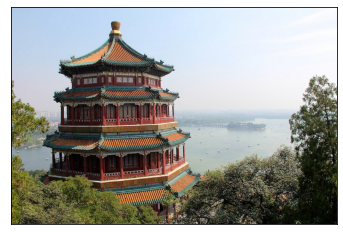

In [28]:
#Problem Statement : To Perform Color Compression on Images using k_means Algorithm

import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
china=load_sample_image("china.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [29]:
#returns the  dimension of the array
china.shape # 427pix/640pix and has 3 colors
china # These values are large for analysis so we normalize into 0 and 1

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [30]:
#reshape the data to [n_samples * n_features] and rescale the colors so that they lie between 0 and 1
data = china/255.0 # scale 0,1
data = data.reshape(427*640,3) # Converted 3D to 2D
data.shape
data #values are between 0 and 1


array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [31]:
import numpy as np
#visualize these pictures in color space , using subset of 10,000 pixels for efficiency
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
        #choose the random subset
        rng=np.random.RandomState(0)
        i=rng.permutation(data.shape[0])[:N]
        colors=colors[i]
        R,G,B=data[i].T
        
        
        fig,ax=plt.subplots(1,2,figsize=(16,6))
        ax[0].scatter(R,G,color=colors,marker='.')
        ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
        ax[1].scatter(R,B,color=colors,marker='.')
        ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
        fig.suptitle(title,size=20)
    

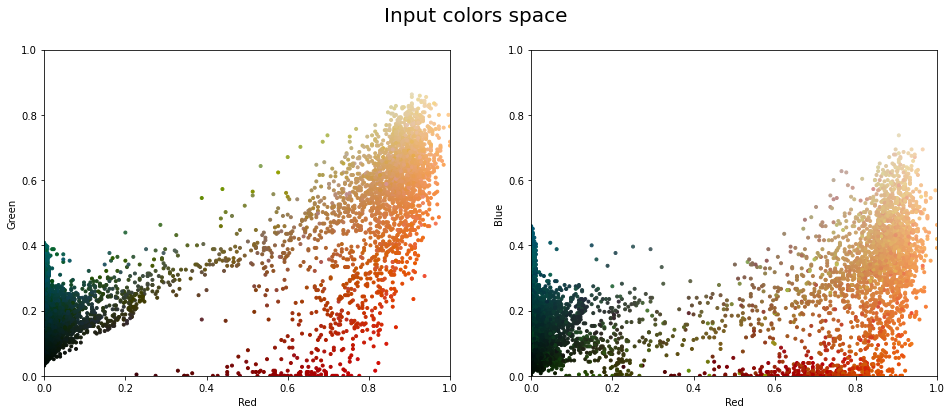

In [16]:
plot_pixels(data,title='Input colors space:16 million possible colors')

In [36]:
#Now the above flower has 16 million colors and we bring down to 16 colors(create 16 clusters for various colors)
#Mini Batch K-means ([11]) has been proposed as an alternative to the K-means algorithm for clustering massive datasets. The advantage of this algorithm is to reduce the computational cost by not using all the dataset each iteration but a subsample of a fixed size.
from sklearn.cluster import MiniBatchKMeans

#It processes in batches and faster , but result same as kmeans.
kmeans=MiniBatchKMeans(16)  # 16 is cluster size , if we reduce the k value image beacomes more blurry.
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
print(new_colors)


[[0.75403286 0.84263386 0.94303115]
 [0.75403286 0.84263386 0.94303115]
 [0.75403286 0.84263386 0.94303115]
 ...
 [0.17035365 0.15424601 0.12002921]
 [0.06477538 0.0583705  0.0344989 ]
 [0.06477538 0.0583705  0.0344989 ]]


Text(0.5, 1.0, '16 color Image')

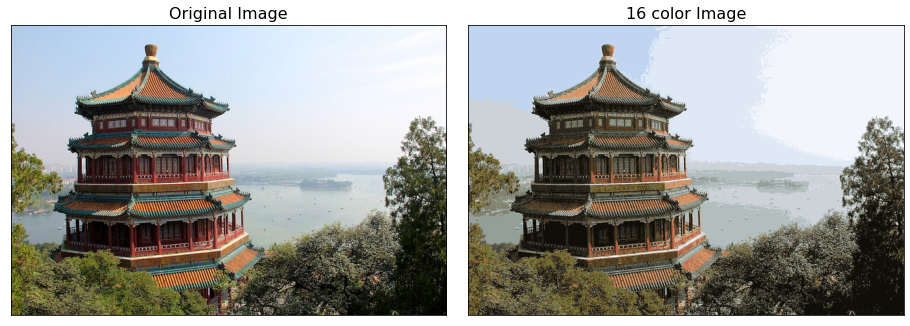

In [37]:
#Show the original and the later image after color compression
china_recolored=new_colors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16 color Image',size=16)

In [ ]:
#Conclusion:Here we can clearly see the diffrence between the colors.
# The 16 color image can now be rendered on a system that is not very soffesticated.